In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [197]:
crypto_df = pd.read_csv("data/crypto_data.csv")
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


# Data Preprocessing

In [223]:
crypto_df.duplicated().sum()
crypto_df.isna().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
IsTrading          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [224]:
crypto_df.dropna(inplace = True)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000


In [225]:
crypto_currency_df = crypto_df.loc[crypto_df.IsTrading == True]
crypto_currency_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000


In [226]:
crypto_currency = crypto_currency_df.loc[crypto_currency_df.TotalCoinsMined > 0].copy()
crypto_currency.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [227]:
from sklearn.preprocessing import OrdinalEncoder

# Transforming text values of 'Algorithm' and 'ProofType' into numeric variables
oc = OrdinalEncoder()
crypto_currency['Algorithm'] = oc.fit_transform(crypto_currency[['Algorithm']])
crypto_currency['ProofType'] = oc.fit_transform(crypto_currency[['ProofType']])

crypto_currency.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,52.0,True,15.0,4.199995e+01,42
2,404,404Coin,52.0,True,15.0,1.055185e+09,532000000
5,1337,EliteCoin,66.0,True,15.0,2.927942e+10,314159265359
7,BTC,Bitcoin,47.0,True,12.0,1.792718e+07,21000000
8,ETH,Ethereum,20.0,True,12.0,1.076842e+08,0


In [228]:
# Removing columns less effective columns from the dataframe.
crypto_currency.drop(columns = ["Unnamed: 0", "CoinName", "IsTrading"], inplace = True)
crypto_currency.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,52.0,15.0,4.199995e+01,42
2,52.0,15.0,1.055185e+09,532000000
5,66.0,15.0,2.927942e+10,314159265359
7,47.0,12.0,1.792718e+07,21000000
8,20.0,12.0,1.076842e+08,0


# Applying PCA

In [204]:
# Standardise data with StandardScaler
crypto_scaled = StandardScaler().fit_transform(crypto_currency)
crypto_scaled

array([[ 3.76459118e-01,  8.91356555e-01, -1.17108170e-01,
        -1.52870298e-01],
       [ 3.76459118e-01,  8.91356555e-01, -9.39695522e-02,
        -1.45008997e-01],
       [ 1.21543803e+00,  8.91356555e-01,  5.24945609e-01,
         4.48942416e+00],
       ...,
       [-2.14047761e+00,  1.67233875e-03, -9.56133629e-02,
        -1.32179374e-01],
       [-1.66106109e+00,  1.67233875e-03, -1.16948169e-01,
        -1.52559984e-01],
       [ 3.76459118e-01, -1.48113469e+00, -1.17105357e-01,
        -1.52855521e-01]])

In [205]:
# Applying PCA to reduce dimensions.
pca = PCA().fit(crypto_scaled)
len(pca.explained_variance_ratio_)

4

Text(0, 0.5, 'Cumulative explained varaince')

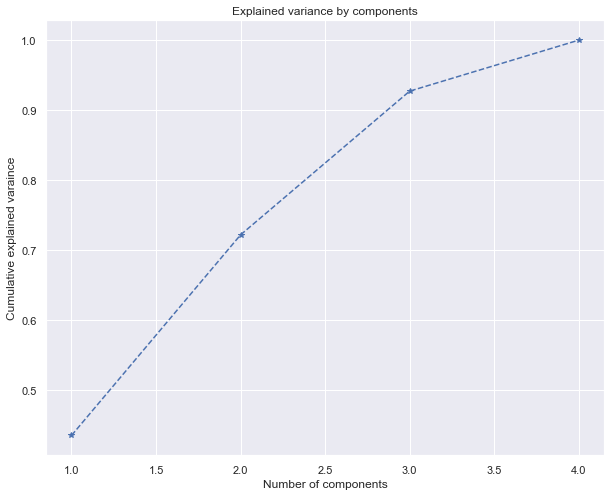

In [206]:
# plotting explained variance ratio to know the nature of its distribution
import seaborn as sns

plt.figure(figsize = (10,8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker='*', linestyle = '--')
plt.title("Explained variance by components")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained varaince")

* The graph shows the amount of variance captured (on the y-axis) depending on the number of components in the x-axis. Here the rule of thumb is to preserve around 90 % of the variance. So, we can decide to keep 3 components.

In [215]:
# Applying PCA to reduce dimensions from 4 to 3, Initialize PCA model
pca = PCA(n_components = 3)

# Get 3 principal components for the crypto data

crypto_pca = pca.fit_transform(crypto_scaled)

In [216]:
# Transform PCA to a dataframe
crypto_pca_df = pd.DataFrame(data = crypto_pca, columns = ['principal_component1', 
                                                         'principal_component2',
                                                        'principal_component3'])
crypto_pca_df.head()

,principal_component1,principal_component2,principal_component3
0,-0.417875,0.810296,0.372138
1,-0.396564,0.815135,0.373256
2,3.124076,2.209780,0.504335
3,-0.192083,0.016266,-0.072910
4,-0.044116,-1.167492,1.012525


In [217]:
pca.explained_variance_ratio_

array([0.4350467 , 0.28670411, 0.20538956])

# KMeans with PCA data

In [218]:
# Finding the best value of k
inertia = []
k = list(range(1,11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters = i, random_state = 20)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

Text(0, 0.5, 'Inertia')

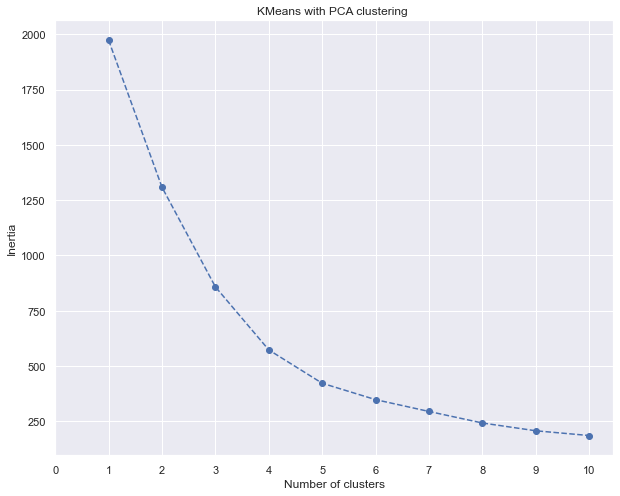

In [219]:
# Create elbow curve
elbow_data = {"k":k, "inertia":inertia}
elbow_df = pd.DataFrame(elbow_data)

plt.figure(figsize = (10,8))
plt.plot(elbow_df.k, elbow_df.inertia, marker='o', linestyle = '--')
plt.xticks(list(range(11)))
plt.title("KMeans with PCA clustering ")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [220]:
# Predicting clusters with k = 4
# Initialize the k-means model
model = KMeans(n_clusters = 4, random_state = 20)

# Fit the model
model.fit(crypto_pca_df)

# predict clusters
predictions = model.predict(crypto_pca_df)

# Add the predicted class column to the dataframe

crypto_pca_df['class'] = model.labels_
crypto_pca_df.head()

,principal_component1,principal_component2,principal_component3,class
0,-0.417875,0.810296,0.372138,0
1,-0.396564,0.815135,0.373256,0
2,3.124076,2.209780,0.504335,0
3,-0.192083,0.016266,-0.072910,0
4,-0.044116,-1.167492,1.012525,2


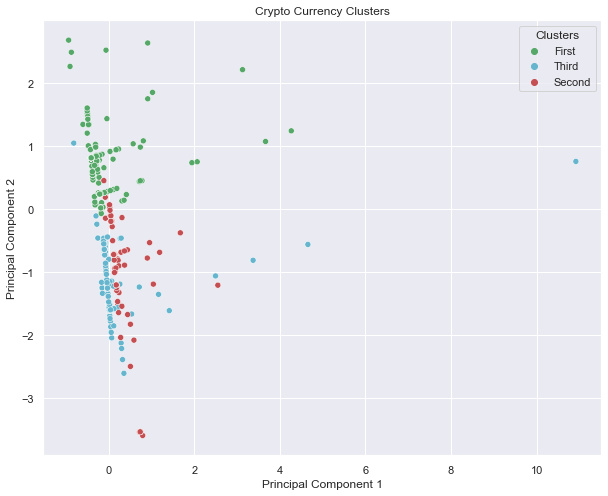

In [222]:
# Visualize the clusters

crypto_pca_df['Clusters'] = crypto_pca_df['class'].map({0:'First', 1:'Second',2:'Third'})

plt.figure(figsize = (10,8))
sns.scatterplot(x = crypto_pca_df['principal_component1'], y=crypto_pca_df['principal_component2'], 
           hue = crypto_pca_df['Clusters'], palette = ['g', 'c', 'r'])
plt.title("Crypto Currency Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()